<a href="https://colab.research.google.com/github/mohiddinyallur/Flights-Analytics-NY-2013/blob/main/Flight_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data analytics on flights departing from New York's thre major airports -LGA, JFK and EWR**

Project Overview:
 This project focuses on analyzing data related to flights departing from three major airports in New York. Our goal is to uncover important trends and patterns in aviation operations. By leveraging data visualization and statistical analysis, we aim to understand the intricacies of aviation and provide actionable insights

# **Problem statement:**

To evaluate the flights departing from airports to understand the air traffic and delays in departing and arrivals , and busy days/months at the respective airports.

# Data extraction

Import a CSV file, data set which contains the data of flights departing from NY airports to Multple destinations across US for the year 2013.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
fdata=pd.read_csv('/content/drive/MyDrive/DA-Projects/Flight analytics/Data sets/flights_2.csv')
fdata.head()

,Unnamed: 0,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,...,origin,dest,air_time,distance,hour,minute,time_hour,name,Departure delayed,Arrival delayed
0,0,0,2013,1,1,5.17,5.15,0.02,8.30,8.19,...,EWR,IAH,2.27,1400,5,15,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
1,1,1,2013,1,1,5.33,5.29,0.04,8.50,8.30,...,LGA,IAH,2.27,1416,5,29,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
2,2,2,2013,1,1,5.42,5.40,0.02,9.23,8.50,...,JFK,MIA,2.00,1089,5,40,01-01-2013 5.00,American Airlines Inc.,Yes,Yes
3,3,3,2013,1,1,5.44,5.45,-0.01,10.04,10.22,...,JFK,BQN,2.23,1576,5,45,01-01-2013 5.00,JetBlue Airways,No,No
4,4,4,2013,1,1,5.54,6.00,-0.06,8.12,8.37,...,LGA,ATL,1.16,762,6,0,01-01-2013 6.00,Delta Air Lines Inc.,No,No


# Data Wrangling

In [63]:
pd.set_option('display.max_columns',21)
fdata.head()

,Unnamed: 0,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,...,origin,dest,air_time,distance,hour,minute,time_hour,name,Departure delayed,Arrival delayed
0,0,0,2013,1,1,5.17,5.15,0.02,8.30,8.19,...,EWR,IAH,2.27,1400,5,15,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
1,1,1,2013,1,1,5.33,5.29,0.04,8.50,8.30,...,LGA,IAH,2.27,1416,5,29,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
2,2,2,2013,1,1,5.42,5.40,0.02,9.23,8.50,...,JFK,MIA,2.00,1089,5,40,01-01-2013 5.00,American Airlines Inc.,Yes,Yes
3,3,3,2013,1,1,5.44,5.45,-0.01,10.04,10.22,...,JFK,BQN,2.23,1576,5,45,01-01-2013 5.00,JetBlue Airways,No,No
4,4,4,2013,1,1,5.54,6.00,-0.06,8.12,8.37,...,LGA,ATL,1.16,762,6,0,01-01-2013 6.00,Delta Air Lines Inc.,No,No


In [5]:
#Number of flights departing per day
#Number of flights departing per day at each airport
#Number of flights by airline
#maximum flights and minimum flights (Day and Month wise )
#Most connecting destination Airport
#Average,max and min Delay in departure  (Total )
#Average,max and mun  Delay in arrival (Total)
#Average,max and min departure delay per airport
#Average ,Max, min airtime
#Distance covered by flights by airline
#Metrics for airline
 #Flights which covered max and min distance
 #Delay evaluavtion
 #On time arrivals
# Metrics for the airports
#average Delay in departure and arrival
#number of flights per day/month -by airlines
#Air traffic evaluation

In [64]:
fdata.shape

(328063, 24)

In [65]:
fdata.columns

Index(['Unnamed: 0', 'id', 'year', 'month', 'day', 'dep_time',
       'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'time_hour', 'name',
       'Departure delayed', 'Arrival delayed'],
      dtype='object')

In [66]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328063 entries, 0 to 328062
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         328063 non-null  int64  
 1   id                 328063 non-null  int64  
 2   year               328063 non-null  int64  
 3   month              328063 non-null  int64  
 4   day                328063 non-null  int64  
 5   dep_time           328063 non-null  float64
 6   sched_dep_time     328063 non-null  float64
 7   dep_delay          328063 non-null  float64
 8   arr_time           328063 non-null  float64
 9   sched_arr_time     328063 non-null  float64
 10  arr_delay          328063 non-null  float64
 11  carrier            328063 non-null  object 
 12  flight             328063 non-null  int64  
 13  tailnum            328063 non-null  object 
 14  origin             328063 non-null  object 
 15  dest               328063 non-null  object 
 16  ai

In [9]:
#Shape of the data
#Check what all columns are existing
#Check data types of columns
#Missing values check
#Duplicated value
#Outliers

#Data Analysis --> EDA -->
# Univariate Analysis
# Bivariate Analysis
# Multivariate Analysis

In [69]:
#Dropping unnecessary column Unnamed 0
fdata.drop(['Unnamed: 0'], axis=1, inplace=True)

In [72]:
fdata.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'Departure delayed', 'Arrival delayed'],
      dtype='object')

In [70]:
#Missing Values check
fdata.isnull().sum()

id                     0
year                   0
month                  0
day                    0
dep_time               0
sched_dep_time         0
dep_delay              0
arr_time               0
sched_arr_time         0
arr_delay              0
carrier                0
flight                 0
tailnum                0
origin                 0
dest                   0
air_time             717
distance               0
hour                   0
minute                 0
time_hour              0
name                   0
Departure delayed      0
Arrival delayed        0
dtype: int64

In [11]:
fdata.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,Departure delayed,Arrival delayed
0,0,2013,1,1,5.17,5.15,0.02,8.30,8.19,0.11,...,EWR,IAH,2.27,1400,5,15,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
1,1,2013,1,1,5.33,5.29,0.04,8.50,8.30,0.20,...,LGA,IAH,2.27,1416,5,29,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
2,2,2013,1,1,5.42,5.40,0.02,9.23,8.50,0.33,...,JFK,MIA,2.00,1089,5,40,01-01-2013 5.00,American Airlines Inc.,Yes,Yes
3,3,2013,1,1,5.44,5.45,-0.01,10.04,10.22,-0.18,...,JFK,BQN,2.23,1576,5,45,01-01-2013 5.00,JetBlue Airways,No,No
4,4,2013,1,1,5.54,6.00,-0.06,8.12,8.37,-0.25,...,LGA,ATL,1.16,762,6,0,01-01-2013 6.00,Delta Air Lines Inc.,No,No


In [12]:
#Deleting the rows which have null values in Departure time and arrival time column
fdata.dropna(subset=['dep_time','arr_time'],inplace=True)


In [13]:
fdata.isnull().sum()

id                     0
year                   0
month                  0
day                    0
dep_time               0
sched_dep_time         0
dep_delay              0
arr_time               0
sched_arr_time         0
arr_delay              0
carrier                0
flight                 0
tailnum                0
origin                 0
dest                   0
air_time             717
distance               0
hour                   0
minute                 0
time_hour              0
name                   0
Departure delayed      0
Arrival delayed        0
dtype: int64

In [14]:
fdata.duplicated().sum()

0

In [15]:
# Replacing null values in arrival and departure delay as Zero
fdata['dep_delay'].fillna(0,inplace=True)
fdata['arr_delay'].fillna(0,inplace=True)



In [16]:
fdata.isnull().sum()

id                     0
year                   0
month                  0
day                    0
dep_time               0
sched_dep_time         0
dep_delay              0
arr_time               0
sched_arr_time         0
arr_delay              0
carrier                0
flight                 0
tailnum                0
origin                 0
dest                   0
air_time             717
distance               0
hour                   0
minute                 0
time_hour              0
name                   0
Departure delayed      0
Arrival delayed        0
dtype: int64

In [17]:
#Create two columns to determine departure delayed:Yes or No & Arrival delayed :Yes or No
fdata['Departure delayed']=np.where(fdata['dep_delay']>0,'Yes','No')
fdata['Arrival delayed']=np.where(fdata['arr_delay']>0,'Yes','No')
fdata.to_csv('/content/drive/MyDrive/DA-Projects/Flight analytics/Data sets/flights_2.csv')


In [18]:
fdata.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,Departure delayed,Arrival delayed
0,0,2013,1,1,5.17,5.15,0.02,8.30,8.19,0.11,...,EWR,IAH,2.27,1400,5,15,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
1,1,2013,1,1,5.33,5.29,0.04,8.50,8.30,0.20,...,LGA,IAH,2.27,1416,5,29,01-01-2013 5.00,United Air Lines Inc.,Yes,Yes
2,2,2013,1,1,5.42,5.40,0.02,9.23,8.50,0.33,...,JFK,MIA,2.00,1089,5,40,01-01-2013 5.00,American Airlines Inc.,Yes,Yes
3,3,2013,1,1,5.44,5.45,-0.01,10.04,10.22,-0.18,...,JFK,BQN,2.23,1576,5,45,01-01-2013 5.00,JetBlue Airways,No,No
4,4,2013,1,1,5.54,6.00,-0.06,8.12,8.37,-0.25,...,LGA,ATL,1.16,762,6,0,01-01-2013 6.00,Delta Air Lines Inc.,No,No


# Analyse Flights , counts and trends in activity

In [57]:
#Flight count by month
Flights_by_Month=fdata.groupby('month')['id'].count().sort_values(ascending=False)
Flights_by_Month

month
8     28821
10    28642
7     28382
5     28195
3     27943
4     27620
6     27171
12    27076
9     27070
11    27015
1     26468
2     23660
Name: id, dtype: int64

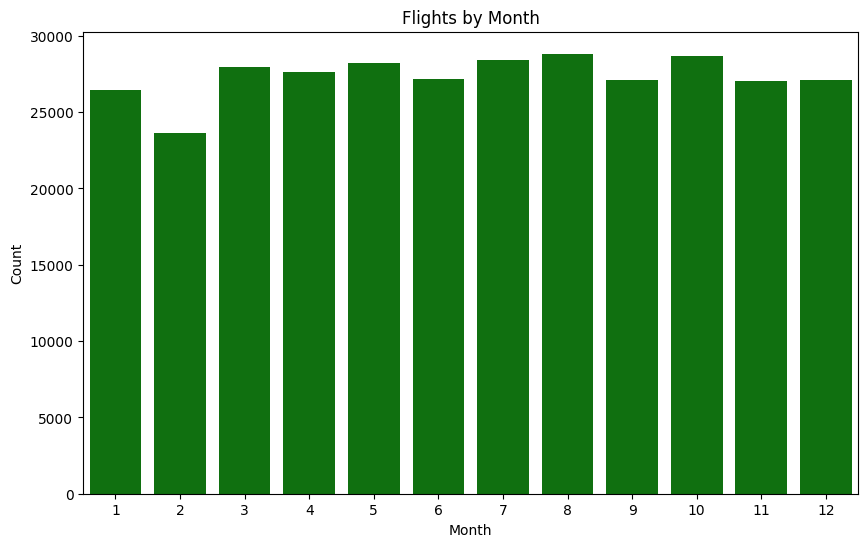

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=fdata,color='green')
plt.title('Flights by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

August of 2013 shows more number of flights with count 28,821, which flew from NY airports to multiple destinations across US, followed by Octobor with count of 28,642

In [76]:
#Number of flights by airline
Flights_by_Airline=fdata.groupby('name')['id'].count().sort_values(ascending=False)
Flights_by_Airline

name
United Air Lines Inc.          57916
JetBlue Airways                54137
ExpressJet Airlines Inc.       51251
Delta Air Lines Inc.           47746
American Airlines Inc.         32059
Envoy Air                      25076
US Airways Inc.                19842
Endeavor Air Inc.              17345
Southwest Airlines Co.         12075
Virgin America                  5127
AirTran Airways Corporation     3181
Alaska Airlines Inc.             712
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: id, dtype: int64

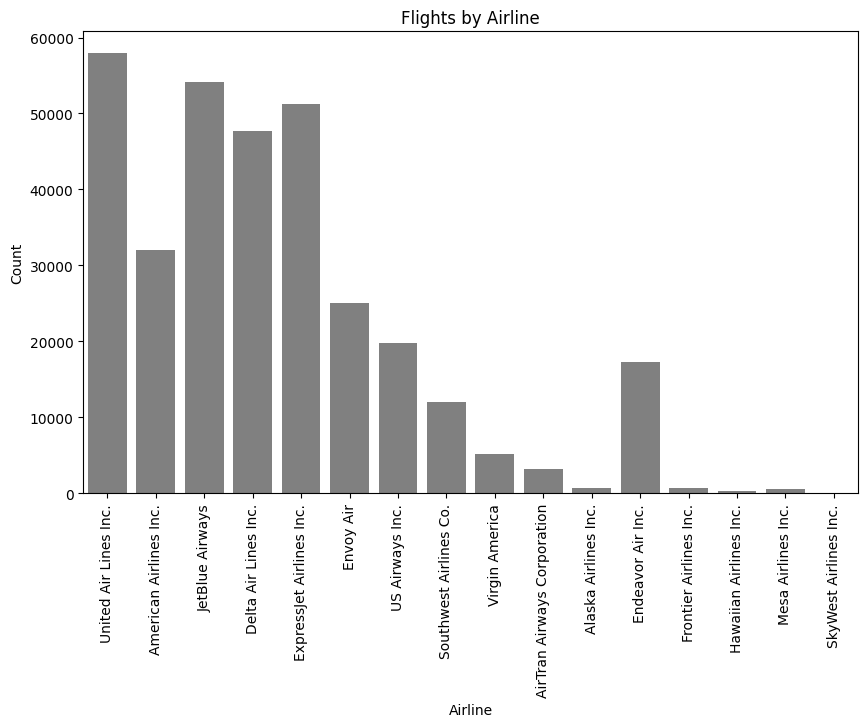

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='name', data=fdata,color='grey')
plt.title('Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

United Airlines has the highest number of flights commuting from New York to multiple destinations across the United States.

In 2013, a total of 57,916 flights were operated by American Airlines from New York, followed by JetBlue Airways with 54,137 flights.

In [99]:
#Flight counts by Origin airports
Flights_by_Origin=fdata.groupby('origin')['id'].count().sort_values(ascending=False)
Flights_by_Origin

origin
EWR    117445
JFK    109284
LGA    101334
Name: id, dtype: int64

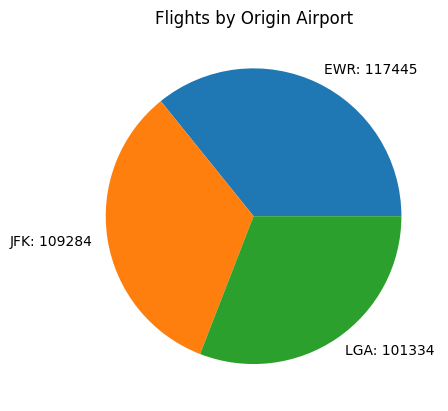

In [110]:
plt.pie(Flights_by_Origin,labels=['EWR: '+str(Flights_by_Origin['EWR']), 'JFK: '+str(Flights_by_Origin['JFK']), 'LGA: '+str(Flights_by_Origin['LGA'])])
plt.title('Flights by Origin Airport')
plt.show()

EWR has the highest number of flights departing in year 2013

### **Analyse the Dealy and departure ,using numbers and plots**

# **1.Delay in Departures**

In [19]:
#Analyse the delays in Departures
fdata["Departure delayed"].value_counts()


Departure delayed
No     199942
Yes    128121
Name: count, dtype: int64

In [20]:
fdata["Departure delayed"].value_counts(normalize=True)*100

Departure delayed
No     60.946221
Yes    39.053779
Name: proportion, dtype: float64

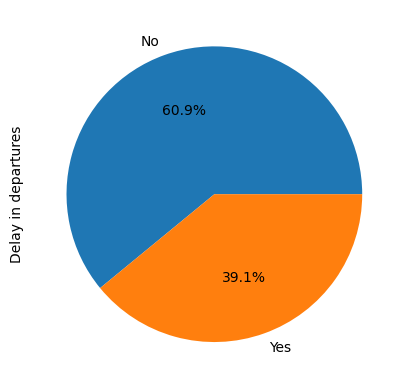

In [21]:
fdata["Departure delayed"].value_counts().plot(kind='pie',autopct='%1.1f%%',label="Delay in departures")
plt.show()

insights :38.1% of total flights have been delayed while departing from New york in 2013, across multiple airports within New york

In [22]:
#Average Delay time
Avg_Departure_Delay=fdata['dep_delay'].mean()*100
Avg_Departure_Delay

12.57597473655975

Flights departing from NY airports have average delay of 12.6 minutes overall.

In [23]:
#Average delay  time by departure airport
avg_dep_delay_by_origin=fdata.groupby('origin')['dep_delay'].mean()*100
avg_dep_delay_by_origin

origin
EWR    15.035216
JFK    12.044673
LGA    10.298725
Name: dep_delay, dtype: float64

EWR airport has the highest average departure delay. 15 minutes average delay

In [24]:
#Delay in Departures by  Origin airport
departure_delay_counts_by_O_Airport = fdata.groupby('origin')['Departure delayed'].value_counts(normalize=True)*100
departure_delay_counts_by_O_Airport

origin  Departure delayed
EWR     No                   55.215633
        Yes                  44.784367
JFK     No                   61.623842
        Yes                  38.376158
LGA     No                   66.857126
        Yes                  33.142874
Name: proportion, dtype: float64

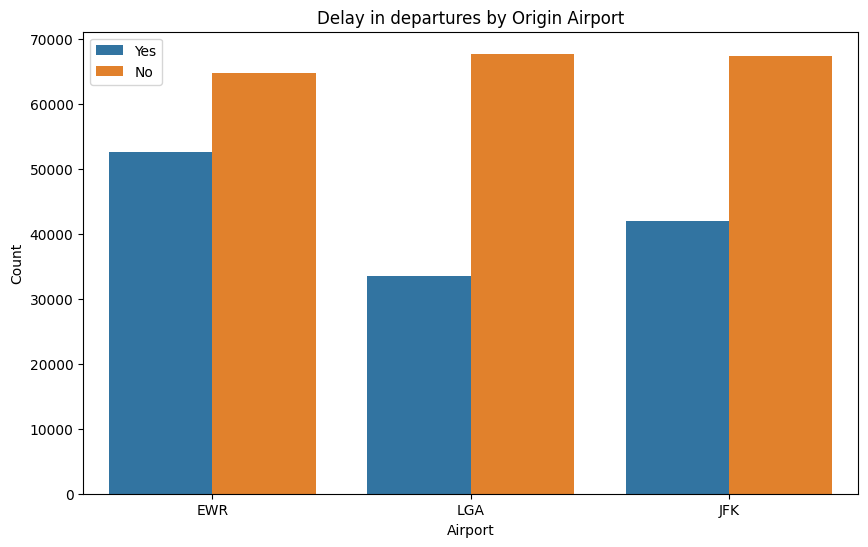

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='origin',hue='Departure delayed' , data=fdata)
plt.title('Delay in departures by Origin Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.legend()
plt.show()

Insight: EWR airport has the more departure delays compare ot LGA and JFK airports.
EWR:Newark Liberty intl Airport
LGA:La guardia Airport
JFK:John F Kennedy intl airport

In [26]:
#Delay in Departures by Destination airport
departure_delay_counts_by_D_Airport = fdata.groupby('dest')['Departure delayed'].value_counts()
departure_delay_counts_by_D_Airport

dest  Departure delayed
ABQ   No                   139
      Yes                  115
ACK   No                   183
      Yes                   82
ALB   No                   209
                          ... 
TVC   Yes                   35
TYS   No                   298
      Yes                  280
XNA   No                   744
      Yes                  261
Name: count, Length: 207, dtype: int64

In [27]:
#Top 10 destination airport , to which flights have been delayed originating from NY
Top_10_Destination_Airports_delays=departure_delay_counts_by_D_Airport[:, 'Yes'].sort_values(ascending=False).head(10)
Top_10_Destination_Airports_delays

dest
LAX    6471
ORD    6328
ATL    6065
SFO    5689
MCO    5466
FLL    5056
BOS    4812
CLT    4273
MIA    4098
DEN    3620
Name: count, dtype: int64

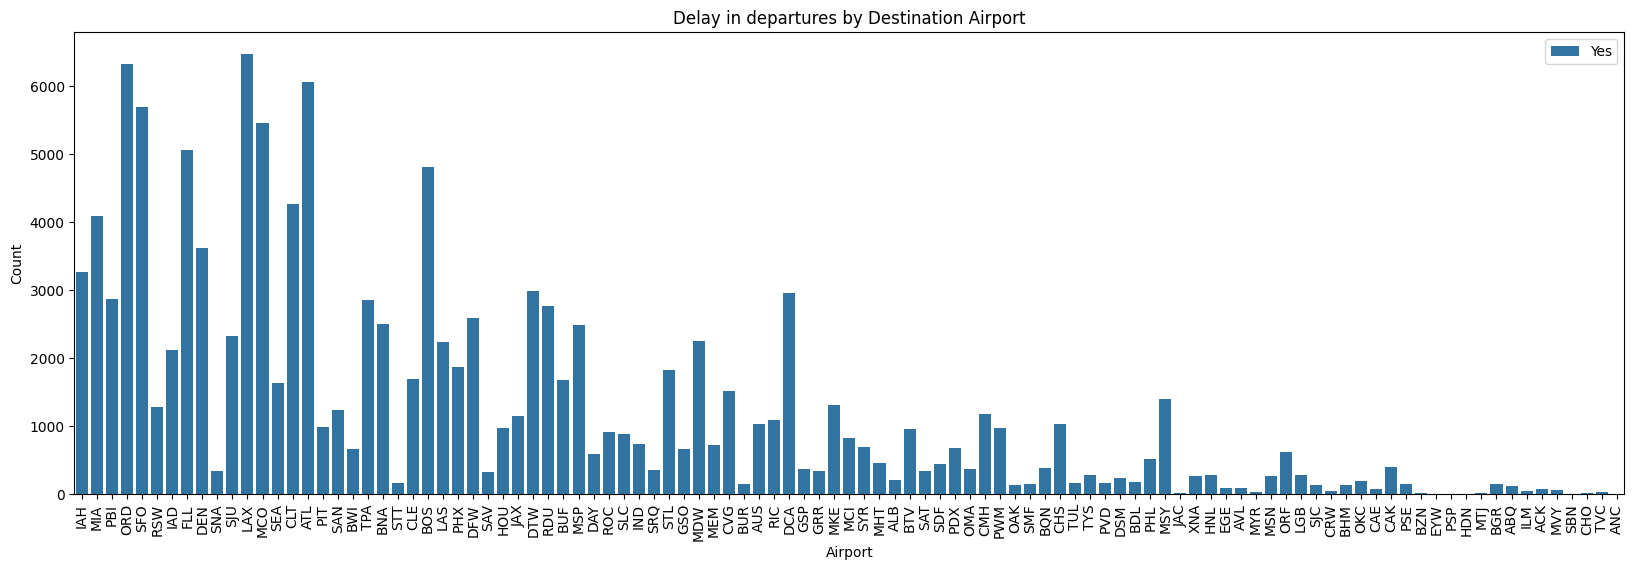

In [28]:
plt.figure(figsize=(20, 6))
sns.countplot(x='dest',hue='Departure delayed' , data=fdata[fdata['Departure delayed'] == 'Yes'])
plt.title('Delay in departures by Destination Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Insight :LAX airport has the maximum Number of flights delayed(6471) next to ORD(6238) , which have been departed from NY airports (LAX- Los Angeles International Airport),ORD:Chicago O'Hare International Airport

In [29]:
# Number of flights by Origin airport

departure_delay_counts_by_O_Airport = fdata.groupby('origin')['Departure delayed'].value_counts()
departure_delay_counts_by_O_Airport.groupby('origin').sum()


origin
EWR    117445
JFK    109284
LGA    101334
Name: count, dtype: int64

Insight :EWR has the highest number of flights departing from Ney york in 2013.

# 2.Delay in arrivals


In [30]:
#Analyse the delays in Arrivals
fdata["Arrival delayed"].value_counts()

Arrival delayed
No     195059
Yes    133004
Name: count, dtype: int64

In [31]:
fdata["Arrival delayed"].value_counts(normalize = True)*100


Arrival delayed
No     59.457787
Yes    40.542213
Name: proportion, dtype: float64

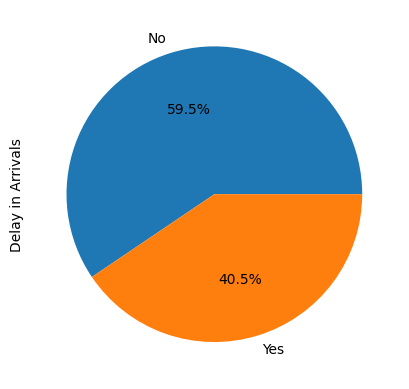

In [32]:
fdata["Arrival delayed"].value_counts().plot(kind='pie',autopct='%1.1f%%',label="Delay in Arrivals")
plt.show()

Insight : 40.5% of flights departed from New york airports to different destinations have been delayed in year 2013

In [33]:
#Average delay in arrivals
Avg_Arrival_Delay=fdata['arr_delay'].mean()*100
Avg_Arrival_Delay

6.8803065264903385

Avergage flight delay time is 6.8 minutes , all of these flights have been deparrted from NY airports and arrivaed at destinations

In [34]:
avg_arrival_depay_by_dest=fdata.groupby('dest')['arr_delay'].mean()*100
avg_arrival_depay_by_dest

dest
ABQ     4.381890
ACK     4.833962
ALB    14.397129
ANC    -2.500000
ATL    11.276003
         ...    
TPA     7.394516
TUL    33.319865
TVC    12.968421
TYS    24.069204
XNA     7.369154
Name: arr_delay, Length: 104, dtype: float64

In [35]:
#Top 10 destination airports where flights have been delayed in arrivals by average delay time
avg_arrival_depay_by_dest.sort_values(ascending=False).head(10)

dest
CAE    41.764151
TUL    33.319865
OKC    30.046729
JAC    26.818182
TYS    24.069204
RIC    20.102684
MSN    20.051786
CAK    19.698337
DSM    18.933333
GRR    18.114911
Name: arr_delay, dtype: float64

In [36]:
#Bottom 10 destination airports where flights have been delayed in arrivals by average delay time
avg_arrival_depay_by_dest.sort_values(ascending=True).head(10)

dest
LEX   -22.000000
PSP   -12.722222
SNA    -7.868227
STT    -3.835907
ANC    -2.500000
HNL    -1.357447
SEA    -1.094030
MVY    -0.284360
LGB    -0.061747
SLC     0.175753
Name: arr_delay, dtype: float64

CAE airport has the highest average arrival delay among all other destinations,41.76 minutes of average delay in year 2013. CAE =Columbia international airport.
Where as SLC has the least delay of 0.17 minutes and LEX airport has arrivals well ahead of scheduled arrivals
in year 2013 , flights arrived at LEX are average 22 minutes ahead  its scheduled arrival time.

In [37]:
#Arrival Delays by Origin airport
fdata.groupby('origin')['Arrival delayed'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7e98405e9210>>

In [38]:
fdata.groupby('origin')['Arrival delayed'].value_counts(normalize=True)*100

origin  Arrival delayed
EWR     No                 57.342586
        Yes                42.657414
JFK     No                 60.758208
        Yes                39.241792
LGA     No                 60.506839
        Yes                39.493161
Name: proportion, dtype: float64

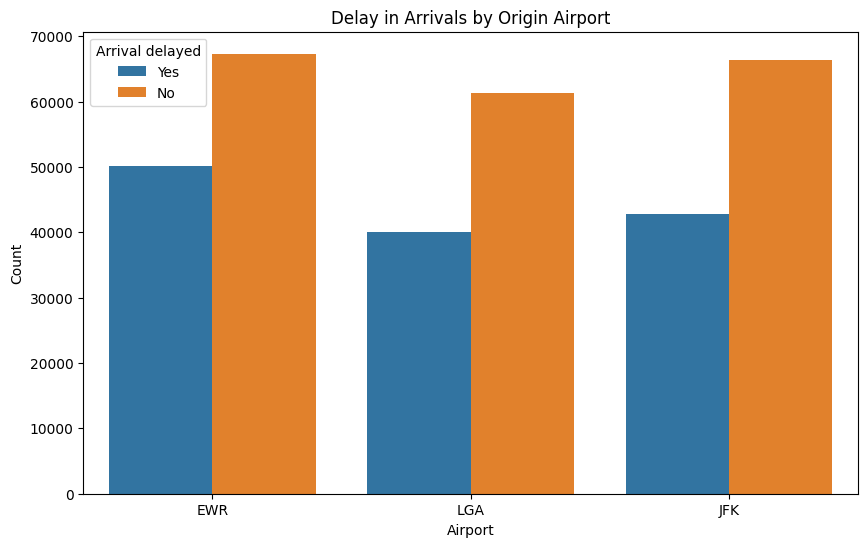

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='origin',hue='Arrival delayed' , data=fdata)
plt.title('Delay in Arrivals by Origin Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.show()

Insights : Data and graph shows Flights departing from EWR are being delayed in arrival at destination airports, this is may be because of delays in departure!
Previous stats shows that EWR has more number of flights being delayed while departing.


In [42]:
#Arrival delays by arrival airports
Arrival_delay_dest=fdata.groupby('dest')['Arrival delayed'].value_counts()
Arrival_delay_dest

dest  Arrival delayed
ABQ   No                 147
      Yes                107
ACK   No                 161
      Yes                104
ALB   No                 234
                        ... 
TVC   Yes                 35
TYS   Yes                307
      No                 271
XNA   No                 549
      Yes                456
Name: count, Length: 207, dtype: int64

In [43]:
#Top 10 Arrival airports where incoming flights have been delayed
Top_10_Destination_Airports_Arrival_delays=Arrival_delay_dest[:, 'Yes'].sort_values(ascending=False).head(10)
Top_10_Destination_Airports_Arrival_delays

dest
ATL    7946
ORD    6198
LAX    5967
CLT    5838
MCO    5545
FLL    5212
SFO    4941
BOS    4743
DCA    4003
MIA    3855
Name: count, dtype: int64

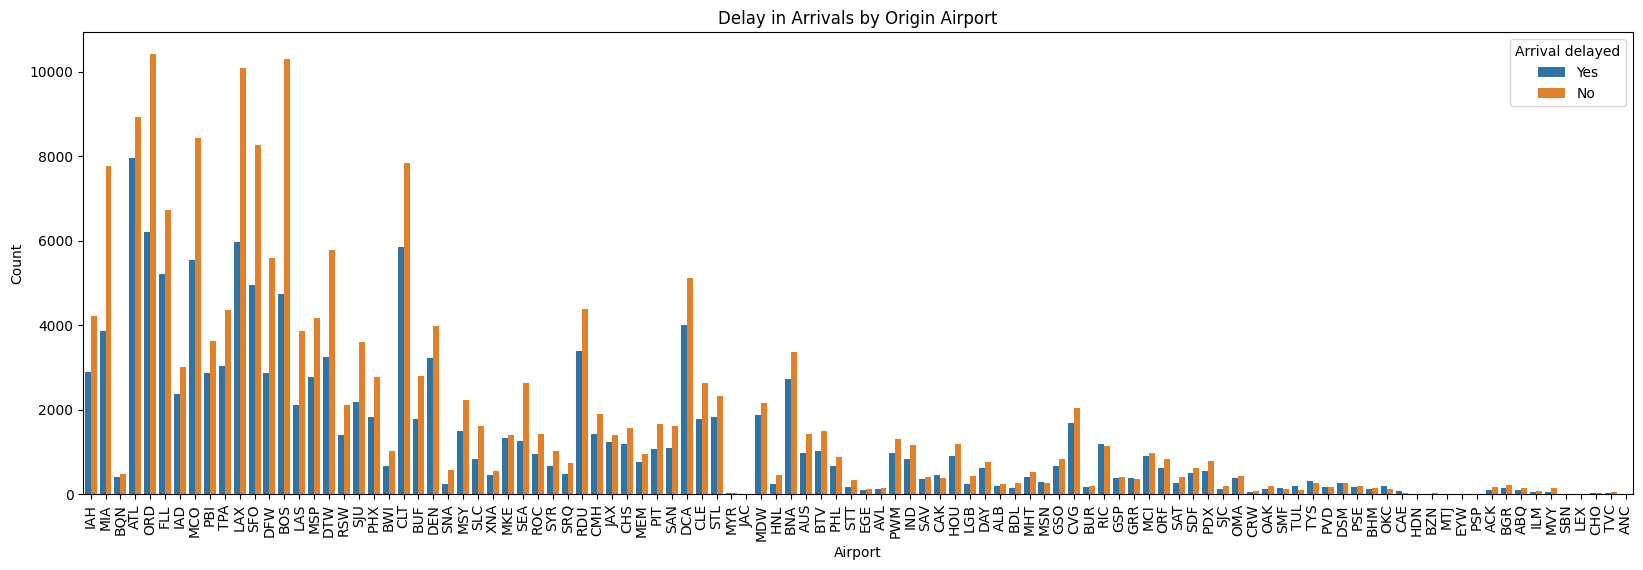

In [41]:
plt.figure(figsize=(20, 6))
sns.countplot(x='dest',hue='Arrival delayed' , data=fdata)
plt.title('Delay in Arrivals by Origin Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Insights :ATL- Hartsfield-Jackson Atlanta International Airport has the more number of flights delayed(7946) in year 2013, these flights were departed from NY city.

In [53]:
Delay_Arrival_Months=fdata.groupby('month')['Arrival delayed'].value_counts()
Delay_Arrival_Months

month  Arrival delayed
1      No                 15318
       Yes                11150
2      No                 13560
       Yes                10100
3      No                 17024
       Yes                10919
4      No                 15098
       Yes                12522
5      No                 18006
       Yes                10189
6      No                 14681
       Yes                12490
7      No                 15078
       Yes                13304
8      No                 17192
       Yes                11629
9      No                 20225
       Yes                 6845
10     No                 18819
       Yes                 9823
11     No                 17376
       Yes                 9639
12     Yes                14394
       No                 12682
Name: count, dtype: int64

In [50]:
Delay_Arrival_Months_yes=Delay_Arrival_Months[:, 'Yes'].sort_values(ascending=False)
Delay_Arrival_Months_yes

month
12    14394
7     13304
4     12522
6     12490
8     11629
1     11150
3     10919
5     10189
2     10100
10     9823
11     9639
9      6845
Name: count, dtype: int64

December of 2013 has the highest number of flights delayed . total 14394 flights have been delayed in month of December

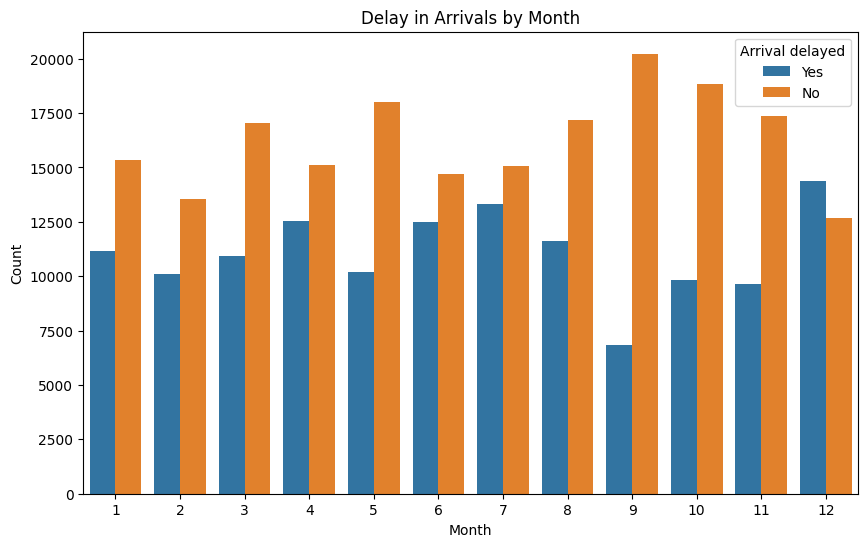

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month',hue='Arrival delayed' , data=fdata)
plt.title('Delay in Arrivals by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()